<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

**Import the required libraries**

In [7]:
# type your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [8]:
# load the csv file
df = pd.read_csv("Life_Expectancy.csv")
df.head(1)

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1,65.0


### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# type your code here

x = df["Adult_Mortality"]
y = df["Expected"]

Xc = sm.add_constant(x)

model = sm.OLS(y,Xc).fit()
model.summary()
model.predict(Xc)



0      65.158243
1      80.237560
2      79.587080
3      60.900554
4      73.851026
         ...    
119    78.522657
120    57.234210
121    77.872177
122    56.169788
123    54.809692
Length: 124, dtype: float64

In [12]:
# the adult_morality explain 50% of variance in life_expectency rate

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# type your code here

x = df["Income_Index"]
Xc = sm.add_constant(x)

model = sm.OLS(y,Xc).fit()
error = df["Expected"] - model.predict(Xc) 
sum_error = np.sum(error)
sum_error

-1.7621459846850485e-12

<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here
df.columns
x = pd.DataFrame([df["Hepatitis "] ,df["Polio"],df["Diphtheria "]])
x1 = x.T
Xc = sm.add_constant(x1)

model = sm.OLS(y,Xc).fit()
model.summary()

# we can analyze that the imumunization explain 13% of variance in life_expectancy

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           0.000468
Time:                        10:33:19   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          57.9881      3.524     16.453      0.000      51.010      64.966
Hepatitis      -0.1037      0.068     -1.528      0.129      -0.238       0.031
Polio           0.0910      0.043      2.099      0.038       0.005       0.177
Diphtheria      0.1613      0.082      1.969      0.051      -0.001       0.323
==============================================================================
Omnibus:                        4.513   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.279
Skew:                          -0.396   Prob(JB):                        0.118
Kurtosis:                       2.550   Cond. No.                         755.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y (Life_expectency) = 57.98 + (-0.01037)* Hepatitis + (0.0910)*Polio + (0.1613)*Diphtheria

by default 57.98 year or 58 year



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# type your code here

X = df.iloc[:,[3,7,8]]
X = sm.add_constant(X)

y = df['Expected']

MLR_model = sm.OLS(y,X).fit()
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     9.690
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           8.92e-06
Time:                        23:42:22   Log-Likelihood:                -426.90
No. Observations:                 124   AIC:                             861.8
Df Residuals:                     120   BIC:                             873.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                63.5086      3.03

In [54]:
X = Developed[["Hepatitis ", "Polio", "Diphtheria "]]
y = Developed["Expected"]
Xc = sm.add_constant(X)
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.256
Date:                Sat, 05 Jun 2021   Prob (F-statistic):              0.325
Time:                        11:08:28   Log-Likelihood:                -44.484
No. Observations:                  19   AIC:                             96.97
Df Residuals:                      15   BIC:                             100.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          76.0738     25.334      3.003      0.009      22.076     130.071
Hepatitis       0.0392      0.034      1.148      0.269      -0.034       0.112
Polio           0.7591      0.440      1.724      0.105      -0.179       1.698
Diphtheria     -0.7389      0.458     -1.612      0.128      -1.716       0.238
==============================================================================
Omnibus:                        6.612   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                4.288
Skew:                          -0.712   Prob(JB):                        0.117
Kurtosis:                       4.840   Cond. No.                     6.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# type your code here

x = df.iloc[:,2:17]
encode = pd.get_dummies(df["Status"], drop_first = True)
x1 = pd.concat([x, encode], axis =1)
xc = sm.add_constant(x1)
y = df["Expected"]

model = sm.OLS(y,xc).fit()
model.summary()

p_values = pd.DataFrame(model.pvalues, columns = ["Pvalue"])
significant_var = p_values[p_values["Pvalue"] < 0.05]
significant_var.index.to_list()



['const',
 'Adult_Mortality',
 'Hepatitis ',
 ' HIV',
 'Population',
 'Income_Index']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [79]:
# type your code here

x = pd.concat([df["Income_Index"],df["GDP"]],axis =1)
y = df["Expected"]
xc = sm.add_constant(x)

model = sm.OLS(y,xc).fit()
model.summary()
y_pre = model.predict()

# y = 42 + 40 * Income_index + Almost_Zero(GDP)

Residual = (y - y_pre)**2
sse = np.sum(Residual)

regression = (y_pre- np.mean(y))**2
ssr = np.sum(regression)

sst = sse + ssr

sst

8819.805483857916


## MLR_model.ssr + MLR_model.ess

for total error formula

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [97]:
# type your code here

x = df["Income_Index"]
xc = sm.add_constant(x)
y = df["Expected"]

mo = sm.OLS(y,x).fit()

mo.summary()
std = 2.449
m = 99.7408

lower = m - std/np.sqrt(len(df)) * 1.96
upper = m + std/np.sqrt(len(df)) * 1.96

lower,upper

(99.3097436830297, 100.17185631697029)

In [98]:
mo.conf_int()

,0,1
Income_Index,97.009477,102.472029


<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [102]:
# type your code here

df.columns

x = df.iloc[:,[2,3,7]]
xc = sm.add_constant(x)
m = sm.OLS(y,xc).fit()

m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     45.18
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           1.29e-19
Time:                        12:03:01   Log-Likelihood:                -393.48
No. Observations:                 124   AIC:                             795.0
Df Residuals:                     120   BIC:                             806.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.3623      1.004     80.060      0.000      78.375      82.350
Adult_Mortality      -0.0548      0.005     -9.996      0.000      -0.066      -0.044
Infant_Deaths         0.0905      0.049      1.844      0.068      -0.007       0.188
Underfive_Deaths     -0.0775      0.038     -2.033      0.044      -0.153      -0.002
==============================================================================
Omnibus:                       54.244   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.185
Skew:                          -1.734   Prob(JB):                     1.33e-31
Kurtosis:                       6.937   Cond. No.                         392.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [109]:
# type your code here

# h0: not significant
# ha: significant

x = df.iloc[:,[2,17]]

encoded_status = pd.get_dummies(data = df['Status'], drop_first=True, prefix = 'Status')

x = pd.concat([x,encoded_status], axis =1)
xc = sm.add_constant(x)
m = sm.OLS(y,xc).fit()

m.f_pvalue



0.0

<a id="assum"> </a>
## 5. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [118]:
# type your code here

# h0: not significant
# ha: significant

x = df.iloc[:,[2,16]]
encoded = pd.get_dummies(df["Status"], drop_first = True)
x = pd.concat([x,encoded],axis =1)
xc = sm.add_constant(x)
y  = df["Expected"]
model = sm.OLS(y,xc).fit()
y_pred = model.predict(xc)

residual = (y_pred - y)

stats.shapiro(residual)

# p_value < 0.05
# reject null hypothesis
# 


ShapiroResult(statistic=0.9584858417510986, pvalue=0.00076043710578233)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# type your code here

## interaction = Status(0,1) * GDP

encoded = pd.get_dummies(df["Status"], drop_first = True)
x = df["GDP"] * encoded["Developing"]
x1 = pd.concat([x,encoded],axis =1)


xc = sm.add_constant(x1)
y = df["Expected"]

model = sm.OLS(y,xc).fit()
model.f_pvalue
model.summary()


# reject ho
# not an significant effect


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     44.30
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           3.67e-15
Time:                        23:58:01   Log-Likelihood:                -406.28
No. Observations:                 124   AIC:                             818.6
Df Residuals:                     121   BIC:                             827.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.1526      1.488     54.531      0.000      78.206      84.099
0              0.0005   7.81e-05      6.000      0.000       0.000       0.001
Developing   -14.2077      1.669     -8.512      0.000     -17.512     -10.903
==============================================================================
Omnibus:                        4.261   Durbin-Watson:                   1.479
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                3.709
Skew:                          -0.399   Prob(JB):                        0.157
Kurtosis:                       3.285   Cond. No.                     3.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# type your code here

x1 = df.iloc[:,2:17]

encoded = pd.get_dummies(df["Status"], drop_first = True)

x2 = pd.concat([x1,encoded],axis =1)

y = df["Expected"]

model = sm.OLS(y,x2).fit()

model.summary()

print(model.rsquared)
print(model.rsquared_adj)

model.summary()

#model.conf_int()

0.9928700308845577
0.9918137391637515


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Expected   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              940.0
Date:                Sun, 06 Jun 2021   Prob (F-statistic):                   4.84e-108
Time:                        02:03:24   Log-Likelihood:                         -399.28
No. Observations:                 124   AIC:                                      830.6
Df Residuals:                     108   BIC:                                      875.7
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Adult_Mortality       -0.0069      0.007     -0.960      0.339      -0.021       0.007
Infant_Deaths         -0.0807      0.066     -1.224      0.223      -0.211       0.050
Hepatitis              0.0305      0.058      0.523      0.602      -0.085       0.146
Measles               -0.0002      0.000     -1.516      0.133      -0.000    5.18e-05
 BMI                  -0.0697      0.041     -1.696      0.093      -0.151       0.012
Underfive_Deaths       0.0712      0.048      1.482      0.141      -0.024       0.166
Polio                  0.0180      0.040      0.449      0.654      -0.061       0.097
Diphtheria             0.0388      0.073      0.535      0.593      -0.105       0.183
 HIV                   0.5728      0.455      1.258      0.211      -0.330       1.475
GDP                -3.684e-05    6.3e-05     -0.585      0.560      -0.000    8.81e-05
Population         -1.747e-08   1.58e-08     -1.107      0.271   -4.87e-08    1.38e-08
Malnourished10_19     -1.1120      0.546     -2.035      0.044      -2.195      -0.029
Malnourished5_9        1.6540      0.496      3.334      0.001       0.671       2.637
Income_Index          43.2384     11.241      3.846      0.000      20.956      65.520
Schooling              2.1667      0.601      3.608      0.000       0.976       3.357
Developing             7.8535      1.821      4.313      0.000       4.244      11.463
==============================================================================
Omnibus:                        7.813   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.565
Skew:                           0.588   Prob(JB):                       0.0228
Kurtosis:                       3.282   Cond. No.                     8.75e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Now we shall consider the FEV dataset.

### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in youths and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height (cm):** Height (cm) in cm 

**Sex:** Gender of a person

**Smoke_habits** Whether the person is a smoker or non- smoker

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [3]:
fev = pd.read_csv("FEV_data.csv")
fev.head()

,Age,Height (cm),Sex,Smoke_habit,FEV
0,16,157.0,F,smoker,1.708
1,17,167.5,F,smoker,1.724
2,19,154.5,F,smoker,1.720
3,16,163.0,M,smoker,1.558
4,16,157.0,M,smoker,1.895


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Identify the numeric variable(s) that have highest impact on the FEV of a person</b>
                </font>
            </div>
        </td>
    </tr>
</table>

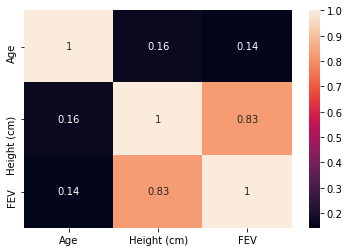

In [27]:
y = fev["FEV"]
x = fev.drop(["FEV","Smoke_habit","Sex"] ,axis =1)

z= pd.concat([x,y], axis =1)

sns.heatmap(z.corr(), annot = True)
plt.show()

# Height have most impact to FEV

In [11]:
# type your code here

y = fev["FEV"]

x = fev.drop(["FEV","Smoke_habit","Sex"] ,axis =1)

encode = pd.get_dummies(fev["Smoke_habit"], drop_first = True)
encode2 = pd.get_dummies(fev["Sex"], drop_first = True)

x1 = pd.concat([x,encode,encode2], axis =1)

xc = sm.add_constant(x1)
model = sm.OLS(y,xc).fit()

model.summary()

#smoker have highest negative impact on FEV


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     379.5
Date:                Sat, 12 Jun 2021   Prob (F-statistic):          2.78e-168
Time:                        10:02:40   Log-Likelihood:                -439.94
No. Observations:                 654   AIC:                             889.9
Df Residuals:                     649   BIC:                             912.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -16.5268      0.575    -28.727      0.000     -17.656     -15.397
Age             0.0026      0.007      0.374      0.708      -0.011       0.016
Height (cm)     0.1192      0.003     34.063      0.000       0.112       0.126
smoker         -0.2231      0.063     -3.515      0.000      -0.348      -0.098
M               0.1801      0.038      4.769      0.000       0.106       0.254
==============================================================================
Omnibus:                      113.397   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.393
Skew:                          -0.625   Prob(JB):                    2.16e-142
Kurtosis:                       7.730   Cond. No.                     5.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. What is the impact of smoking habit of a person on FEV?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

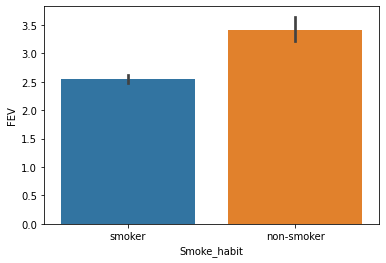

In [30]:
fev["Smoke_habit"]
fev["FEV"]

sns.barplot(fev["Smoke_habit"],fev["FEV"])
plt.show()

In [28]:
y = fev["FEV"]

x = fev.drop(["FEV","Smoke_habit","Sex"] ,axis =1)

encode = pd.get_dummies(fev["Smoke_habit"], drop_first = True)
encode2 = pd.get_dummies(fev["Sex"], drop_first = True)

x1 = pd.concat([x,encode,encode2], axis =1)

xc = sm.add_constant(x1)
model = sm.OLS(y,xc).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     379.5
Date:                Sat, 12 Jun 2021   Prob (F-statistic):          2.78e-168
Time:                        10:25:32   Log-Likelihood:                -439.94
No. Observations:                 654   AIC:                             889.9
Df Residuals:                     649   BIC:                             912.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -16.5268      0.575    -28.727      0.000     -17.656     -15.397
Age             0.0026      0.007      0.374      0.708      -0.011       0.016
Height (cm)     0.1192      0.003     34.063      0.000       0.112       0.126
smoker         -0.2231      0.063     -3.515      0.000      -0.348      -0.098
M               0.1801      0.038      4.769      0.000       0.106       0.254
==============================================================================
Omnibus:                      113.397   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.393
Skew:                          -0.625   Prob(JB):                    2.16e-142
Kurtosis:                       7.730   Cond. No.                     5.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether there is multicollinearity present or not?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

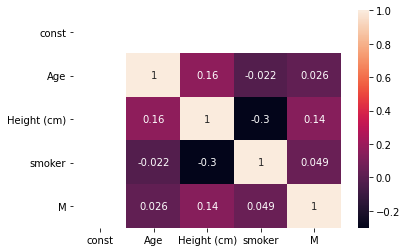

In [32]:
y = fev["FEV"]

x = fev.drop(["FEV","Smoke_habit","Sex"] ,axis =1)

encode = pd.get_dummies(fev["Smoke_habit"], drop_first = True)
encode2 = pd.get_dummies(fev["Sex"], drop_first = True)

x1 = pd.concat([x,encode,encode2], axis =1)

xc = sm.add_constant(x1)
model = sm.OLS(y,xc).fit()

model.summary()

sns.heatmap(xc.corr(), annot = True)
plt.show()

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

pd.DataFrame([vif(xc.values,i) for i in range(xc.shape[1])], index = xc.columns, columns = ["VIF"])


,VIF
const,955.517180
Age,1.028729
Height (cm),1.160690
smoker,1.111985
M,1.028686


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
y = fev["FEV"]

x = fev.drop(["FEV","Smoke_habit","Sex"] ,axis =1)

encode = pd.get_dummies(fev["Smoke_habit"], drop_first = True)
encode2 = pd.get_dummies(fev["Sex"], drop_first = True)

x1 = pd.concat([x,encode,encode2], axis =1)

xc = sm.add_constant(x1)
model = sm.OLS(y,xc).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     379.5
Date:                Sat, 12 Jun 2021   Prob (F-statistic):          2.78e-168
Time:                        10:41:55   Log-Likelihood:                -439.94
No. Observations:                 654   AIC:                             889.9
Df Residuals:                     649   BIC:                             912.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -16.5268      0.575    -28.727      0.000     -17.656     -15.397
Age             0.0026      0.007      0.374      0.708      -0.011       0.016
Height (cm)     0.1192      0.003     34.063      0.000       0.112       0.126
smoker         -0.2231      0.063     -3.515      0.000      -0.348      -0.098
M               0.1801      0.038      4.769      0.000       0.106       0.254
==============================================================================
Omnibus:                      113.397   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.393
Skew:                          -0.625   Prob(JB):                    2.16e-142
Kurtosis:                       7.730   Cond. No.                     5.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model.resid)

#The test statistic is 1.647 Since this is within the range of 1.5 and 2.5, 
# we would consider autocorrelation not to be problematic in this regression model.


1.6472983005218607

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
y = fev["FEV"]

x = fev.drop(["FEV","Smoke_habit","Sex"] ,axis =1)

encode = pd.get_dummies(fev["Smoke_habit"], drop_first = True)
encode2 = pd.get_dummies(fev["Sex"], drop_first = True)

x1 = pd.concat([x,encode,encode2], axis =1)

xc = sm.add_constant(x1)
model = sm.OLS(y,xc).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     379.5
Date:                Sat, 12 Jun 2021   Prob (F-statistic):          2.78e-168
Time:                        10:46:28   Log-Likelihood:                -439.94
No. Observations:                 654   AIC:                             889.9
Df Residuals:                     649   BIC:                             912.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -16.5268      0.575    -28.727      0.000     -17.656     -15.397
Age             0.0026      0.007      0.374      0.708      -0.011       0.016
Height (cm)     0.1192      0.003     34.063      0.000       0.112       0.126
smoker         -0.2231      0.063     -3.515      0.000      -0.348      -0.098
M               0.1801      0.038      4.769      0.000       0.106       0.254
==============================================================================
Omnibus:                      113.397   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.393
Skew:                          -0.625   Prob(JB):                    2.16e-142
Kurtosis:                       7.730   Cond. No.                     5.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

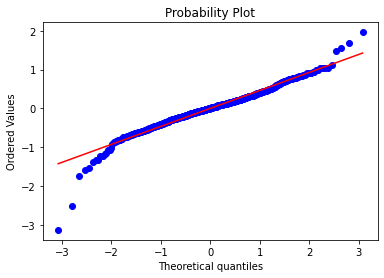

Jarque_beraResult(statistic=652.3925077349533, pvalue=0.0)

In [42]:
res = model.resid
stats.probplot(res, plot=plt)
plt.show()

# ho: data is normal
# ha: data is not normal

stats.jarque_bera(res)

# p_value < 0.05
# reject ho
# data is not normal

<a id="ml_perf"> </a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a full model on 70% of the given data. Calculate the mean square error and the root mean square error on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 100)

model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    FEV   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              2512.
Date:                Sat, 12 Jun 2021   Prob (F-statistic):                   1.42e-246
Time:                        10:58:52   Log-Likelihood:                         -543.70
No. Observations:                 457   AIC:                                      1091.
Df Residuals:                     455   BIC:                                      1100.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0058      0.014     -0.414      0.679      -0.034       0.022
Height (cm)     0.0171      0.002     10.504      0.000       0.014       0.020
==============================================================================
Omnibus:                       42.184   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.251
Skew:                           0.787   Prob(JB):                     7.43e-12
Kurtosis:                       3.459   Cond. No.                         61.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mse, rmse


(0.6038486977492666, 0.7770770217612065)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error for the test set using the model in Q18. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [69]:
# type your code here
np.mean(np.abs((y_test - y_pred) / y_test)) * 100

mae = mean_absolute_error(y_test, y_pred)
mae

0.6065164546568694

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build the full model on 80% of the given data and check if the model is overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [15]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 100)

model = sm.OLS(x_train, y_train).fit()
y_pred_test = model.predict(x_train)

# rmse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = mean_squared_error(y_train, y_pred_test)
np.sqrt(rmse_train)

340.8808250655389